In [2]:
#Dataset 
#https://www.kaggle.com/rajyellow46/wine-quality
#"D:\D DRIVE\pandas\dataset\winequality-red.csv"

In [44]:
#Importing necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing required dataset
df = pd.read_csv(r"D://D DRIVE//pandas//dataset//winequality-red.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

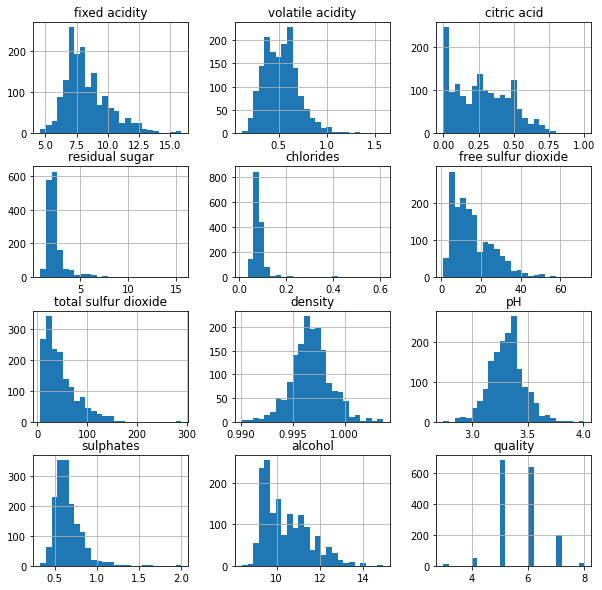

In [10]:
#visvalization
#first see the histogram
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

In [ ]:
#Bar Plot

Text(0, 0.5, 'quality')

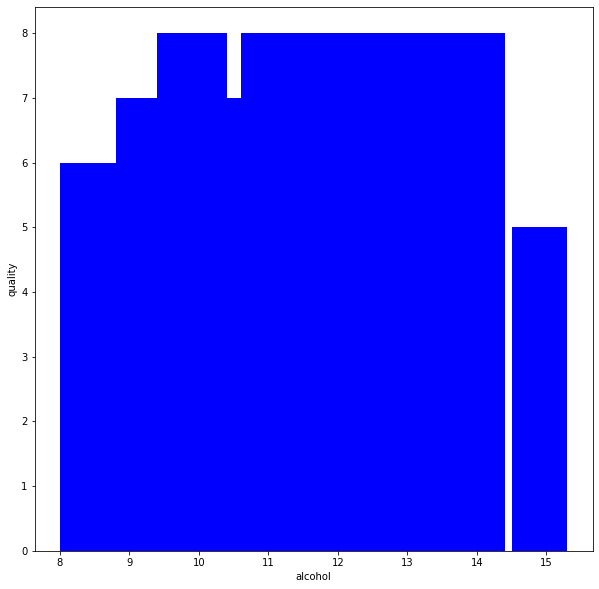

In [47]:
plt.figure(figsize=[10,10])
# plot bar graph
plt.bar(df['alcohol'],df['quality'],color='blue')
# label x-axis
plt.xlabel('alcohol')
#label y-axis
plt.ylabel('quality')

In [11]:
#serch for na value if any
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
#Correlastion
y_corr = df [['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].corr()

In [17]:
y_corr 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<function matplotlib.pyplot.show(close=None, block=None)>

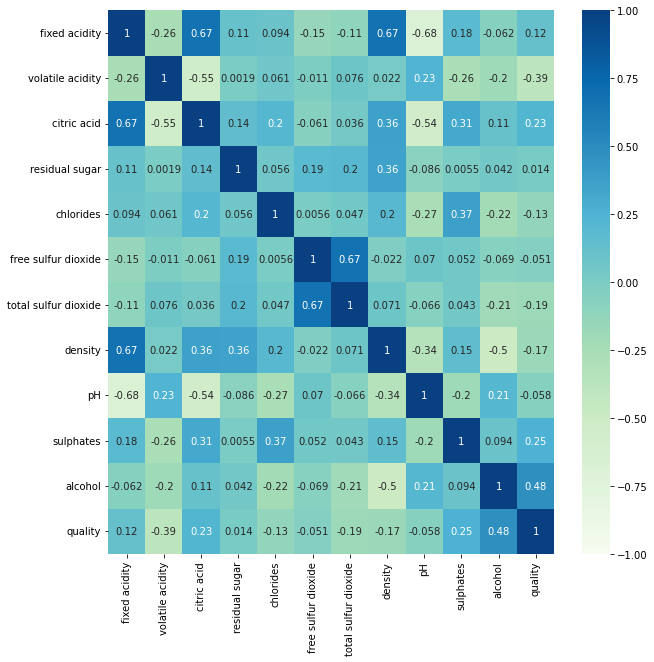

In [24]:
# ploting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(y_corr,annot=True,vmin=-1,vmax=1,cmap='GnBu')
plt.show


Apply Model

# 1.Linear Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['quality'],axis=1),df['quality'],test_size=0.20,random_state=8)

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [58]:
accuracy=model.score(X_test,y_test)
print(accuracy*100)
logl=model.score(X_test,y_test)

62.5


# 2.Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test)
X_test

array([[-0.1491933 ,  0.77397735,  1.33675832, ..., -0.88414054,
        -0.21559096, -0.91646581],
       [-0.77587637,  0.86114514, -1.41332309, ...,  2.05729414,
         0.81328897, -0.45046625],
       [ 2.75633731, -0.44637173,  1.18675388, ..., -1.36297874,
        -0.54050041, -1.28926546],
       ...,
       [ 2.01571186, -0.7950429 ,  1.83677312, ..., -1.63660058,
         0.10931849,  0.85433253],
       [-0.09222211, -1.49238523,  0.58673612, ...,  0.21034678,
         0.21762164,  2.25233123],
       [-0.49102043,  0.2509706 ,  1.3867598 , ..., -0.61051871,
         2.00462363,  1.13393227]])

In [50]:
accuracy = logmodel.score(X_test,y_test)
print(accuracy*100,'%')
loga=(accuracy*100,'%')

60.0 %


# 3)svm-svc

In [41]:
#SVM

model = SVC() 
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:67.47458952306489
Test Set Accuracy:62.5

Confusion Matrix:
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3   9 111  41   2   0]
 [  1   1  24  79  25   1]
 [  0   0   2   9  10   2]
 [  0   0   0   0   0   0]]

ClassificationReport:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.81      0.67      0.73       166
           6       0.61      0.60      0.61       131
           7       0.27      0.43      0.33        23
           8       0.00      0.00      0.00         0

    accuracy                           0.62       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.69      0.62      0.65       320



# 4)Random Forest

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [48]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(X_train,y_train)
# predicting score
rnd_score = rnd.score(X_test,y_test)
print('score of model is : ',rnd_score)


score of model is :  0.703125


In [61]:
print('Model Linear Model',(logl*100),"%")
print('Model Logestic Regression',loga)
print('Model svm svc',"Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100),'%')
print('Model Random Forest','score of model is : ',rnd_score*100,"%")

Model Linear Model 62.5 %
Model Logestic Regression (60.0, '%')
Model svm svc Accuracy:62.5 %
Model Random Forest score of model is :  70.3125 %
